In [3]:
import torch
from torch.distributions import Normal,StudentT,Gamma
import matplotlib.pyplot as plt
import os
import math
os.environ["KMP_DUPLICSCORE_LIB_OK"]="TRUE"

In [4]:
class empirical_KR:

    def __init__(self,X,Y):
        self.X = X.sort()[0]
        self.Y = Y.sort()[0]

    def backward(self,y):
        u = (self.Y<=y.T).float().mean(0)
        Xind = (u*len(self.X)).int()
        Xind[u*len(self.X) % 1 == False] -=1
        return self.X[Xind]
        
    def forward(self,x):
        u = (self.X<=x.T).float().mean(0)
        Yind = (u*len(self.Y)).int()
        Yind[u*len(self.Y) % 1 == False] -=1
        return self.Y[Yind]
        

In [5]:
N,M = 10000,5000
U = Normal(0,1).sample((N,1))
V = Gamma(1,1).sample((M,1))

In [64]:
Uhat = empirical_KR(U,V).backward(V)
Vhat = empirical_KR(U,V).forward(U)

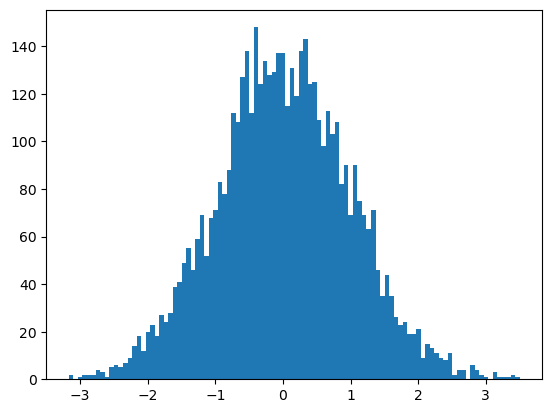

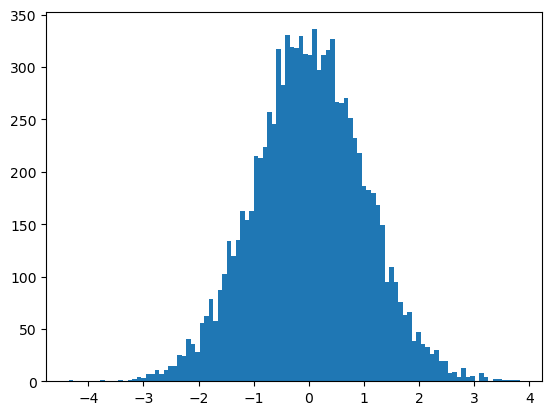

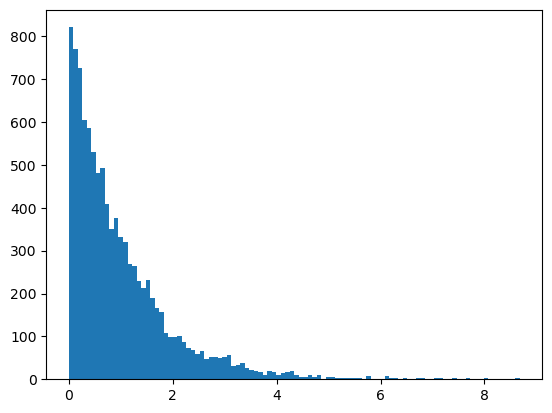

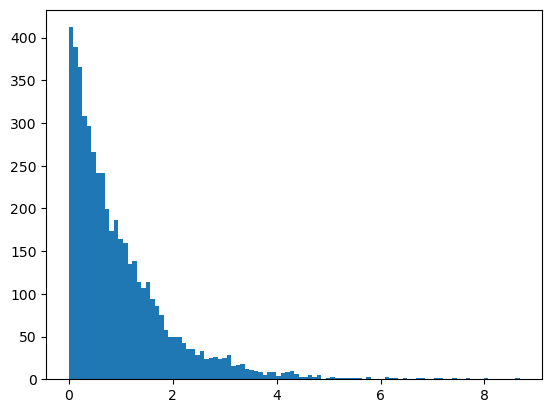

In [65]:
plt.hist(Uhat.numpy(),bins = 100);
plt.show()
plt.hist(U.numpy(),bins = 100);
plt.show()
plt.hist(Vhat.numpy(),bins = 100);
plt.show()
plt.hist(V.numpy(),bins = 100);
plt.show()

In [14]:
feature = lambda x,t: (torch.sigmoid(x)[None]<= t[...,None]).float()
t = torch.linspace(0,1,1000)[:,None]

In [15]:
feature(V,t).size()

torch.Size([1000, 5000, 1])